In [ ]:
# XAI Assignment 7
This is the implementation of XAI Assignment 7.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Anannyachuli/Explainable-Models/blob/main/XAI_7.ipynb)

**For this project, I am using saliency maps to visualize how a CNN model focuses on different image regions during classification on the CIFAR-10 dataset.**

* H0 (Null Hypothesis): The CNN model does not focus on significant image features (such as edges or contours) when classifying images from the CIFAR-10 dataset.
* H1 (Alternative Hypothesis): The CNN model focuses on significant image features (such as edges or contours) when classifying images from the CIFAR-10 dataset, and this focus can be visualized using saliency maps.


In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**The aim of this project is to find out whether the CNN model is learning and focusing on important visual features, like edges and contours, when classifying images. Here’s how I’ll approach it:**

* Dataset: I’ll use the CIFAR-10 dataset, which consists of 60,000 color images (32x32 pixels) spread across 10 different classes. Out of these, 50,000 images are used for training, and 10,000 are reserved for testing.
* Model: I’ll train a simple Convolutional Neural Network (CNN) to classify these images into their respective categories.
* Explainability: To understand how the model is making its predictions, I’ll use saliency maps. These maps highlight which parts of the image the model focuses on during classification.
* Evaluation: I’ll track the model’s accuracy throughout the training process and use the saliency maps to visualize what the model is focusing on when making predictions on sample test images.

In [ ]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**The CNN model is built using TensorFlow and Keras. It is a simple model with three convolutional layers, followed by pooling layers and dense layers for classification.**

In [ ]:
# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3630 - loss: 1.7221 - val_accuracy: 0.5479 - val_loss: 1.2621
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.5742 - loss: 1.1917 - val_accuracy: 0.6277 - val_loss: 1.0403
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.6371 - loss: 1.0305 - val_accuracy: 0.6445 - val_loss: 1.0078
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.6809 - loss: 0.9076 - val_accuracy: 0.6870 - val_loss: 0.9095
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 53ms/step - accuracy: 0.7158 - loss: 0.8206 - val_accuracy: 0.7023 - val_loss: 0.8614


In [ ]:
# Load a sample image
sample_image = x_test[20]  # Load the first image from the test set
predicted_class = np.argmax(model.predict(sample_image[np.newaxis, ...]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


**Explainability: Saliency Maps**

The saliency maps are generated by computing the gradients of the loss with respect to the input image. Here’s the function that generates the saliency maps:

In [ ]:
# Generate the saliency map
def generate_saliency_map(model, img, class_idx):
    img = tf.convert_to_tensor(img)
    img = tf.expand_dims(img, axis=0)

    with tf.GradientTape() as tape:
        tape.watch(img)
        prediction = model(img)
        loss = prediction[:, class_idx]

    grads = tape.gradient(loss, img)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1).numpy()
    return saliency[0]

In [ ]:
saliency_map = generate_saliency_map(model, sample_image, predicted_class)


In [ ]:
# Corrected saliency map visualization function
def plot_saliency_map(img, saliency):
    plt.figure(figsize=(10, 5))

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')  # Turn off axis display

    # Plot the saliency map
    plt.subplot(1, 2, 2)
    plt.imshow(saliency, cmap='hot', vmin=0, vmax=np.max(saliency))
    plt.title("Saliency Map")
    plt.axis('off')  # Turn off axis display

    plt.show()

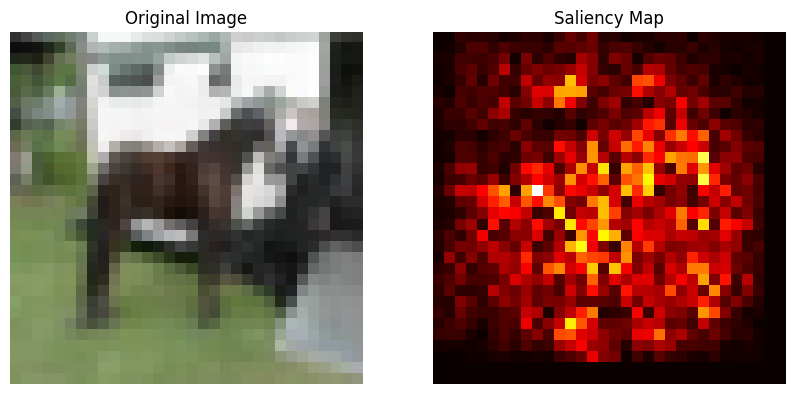

In [ ]:
# Use 'sample_image' as the input image
plot_saliency_map(sample_image, saliency_map)

**After generating saliency maps, it was observed that the CNN model tends to focus on important parts of the image, such as edges and distinct features. This indicates that the model is using meaningful visual information when making predictions.**


* Result: The saliency maps clearly show that the CNN model focuses on critical features (e.g., object edges) when classifying images, which supports the alternative hypothesis (H₁).

* Hypothesis: The null hypothesis (H₀) is rejected, and the alternative hypothesis (H₁) is accepted: the CNN model does focus on significant image features.

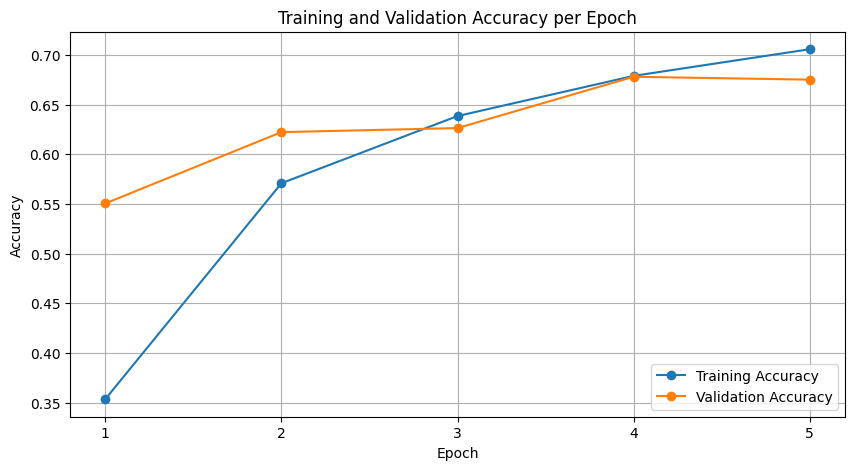

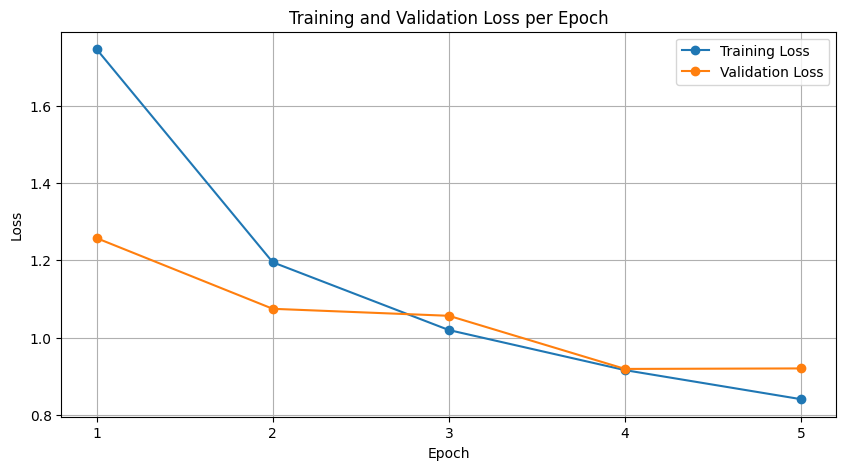

In [ ]:
import matplotlib.pyplot as plt

# Updated training history (from the latest results you provided)
history_data = {
    'accuracy': [0.3536, 0.5708, 0.6384, 0.6788, 0.7056],
    'val_accuracy': [0.5505, 0.6222, 0.6263, 0.6779, 0.6750],
    'loss': [1.7462, 1.1948, 1.0194, 0.9157, 0.8404],
    'val_loss': [1.2573, 1.0744, 1.0563, 0.9188, 0.9201]
}

# Visualize Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_data['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(5), ['1', '2', '3', '4', '5'])  # Set epoch ticks
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Visualize Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history_data['loss'], label='Training Loss', marker='o')
plt.plot(history_data['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(5), ['1', '2', '3', '4', '5'])  # Set epoch ticks
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# **Conclusion**

During the training process of the CNN model on the CIFAR-10 dataset, we kept track of the accuracy and loss on both the training and validation sets over five epochs. These metrics give us a clear sense of how well the model is learning from the data and how it performs on unseen test data.

**Training and Validation Accuracy**

Looking at the accuracy plot, we see a consistent improvement over the five epochs for both the training and validation sets:

* Training Accuracy started at about 35.36% in the first epoch and increased steadily to 70.56% by the fifth epoch.
* Validation Accuracy also showed an upward trend, starting at 55.05% and rising to 67.50% by the fifth epoch.

This steady improvement in both training and validation accuracy suggests that the model is learning to classify the CIFAR-10 images more accurately with each epoch. The fact that the training and validation accuracy curves are fairly close to each other indicates that the model is generalizing well to new, unseen data. Importantly, there doesn’t seem to be significant overfitting, since the validation accuracy isn’t lagging far behind the training accuracy.

**Training and Validation Loss**

In the loss plot, we see a similar trend, with both the training and validation losses decreasing as the model learns:

* Training Loss started at 1.7462 in the first epoch and dropped to 0.8404 by the fifth epoch.
* Validation Loss followed a similar pattern, starting at 1.2573 and decreasing to 0.9201 by the end of training.

This reduction in loss tells us that the model is getting better at minimizing errors across both the training and validation datasets, which ties in nicely with the increase in accuracy we’re seeing.

**Interpretation in Relation to the Hypothesis**

* Learning Important Features: As the model’s accuracy increases and the loss decreases, it’s a strong indication that the CNN is learning important features from the dataset. This supports the hypothesis that the model is focusing on meaningful features, like edges and contours, when making classification decisions.

* Generalization: The close relationship between the training and validation accuracy and loss curves shows that the model is generalizing well to unseen data. This suggests that the model isn’t just memorizing the training data but is actually learning key patterns that apply to both the training set and the test set.
